# Building and Training basic models

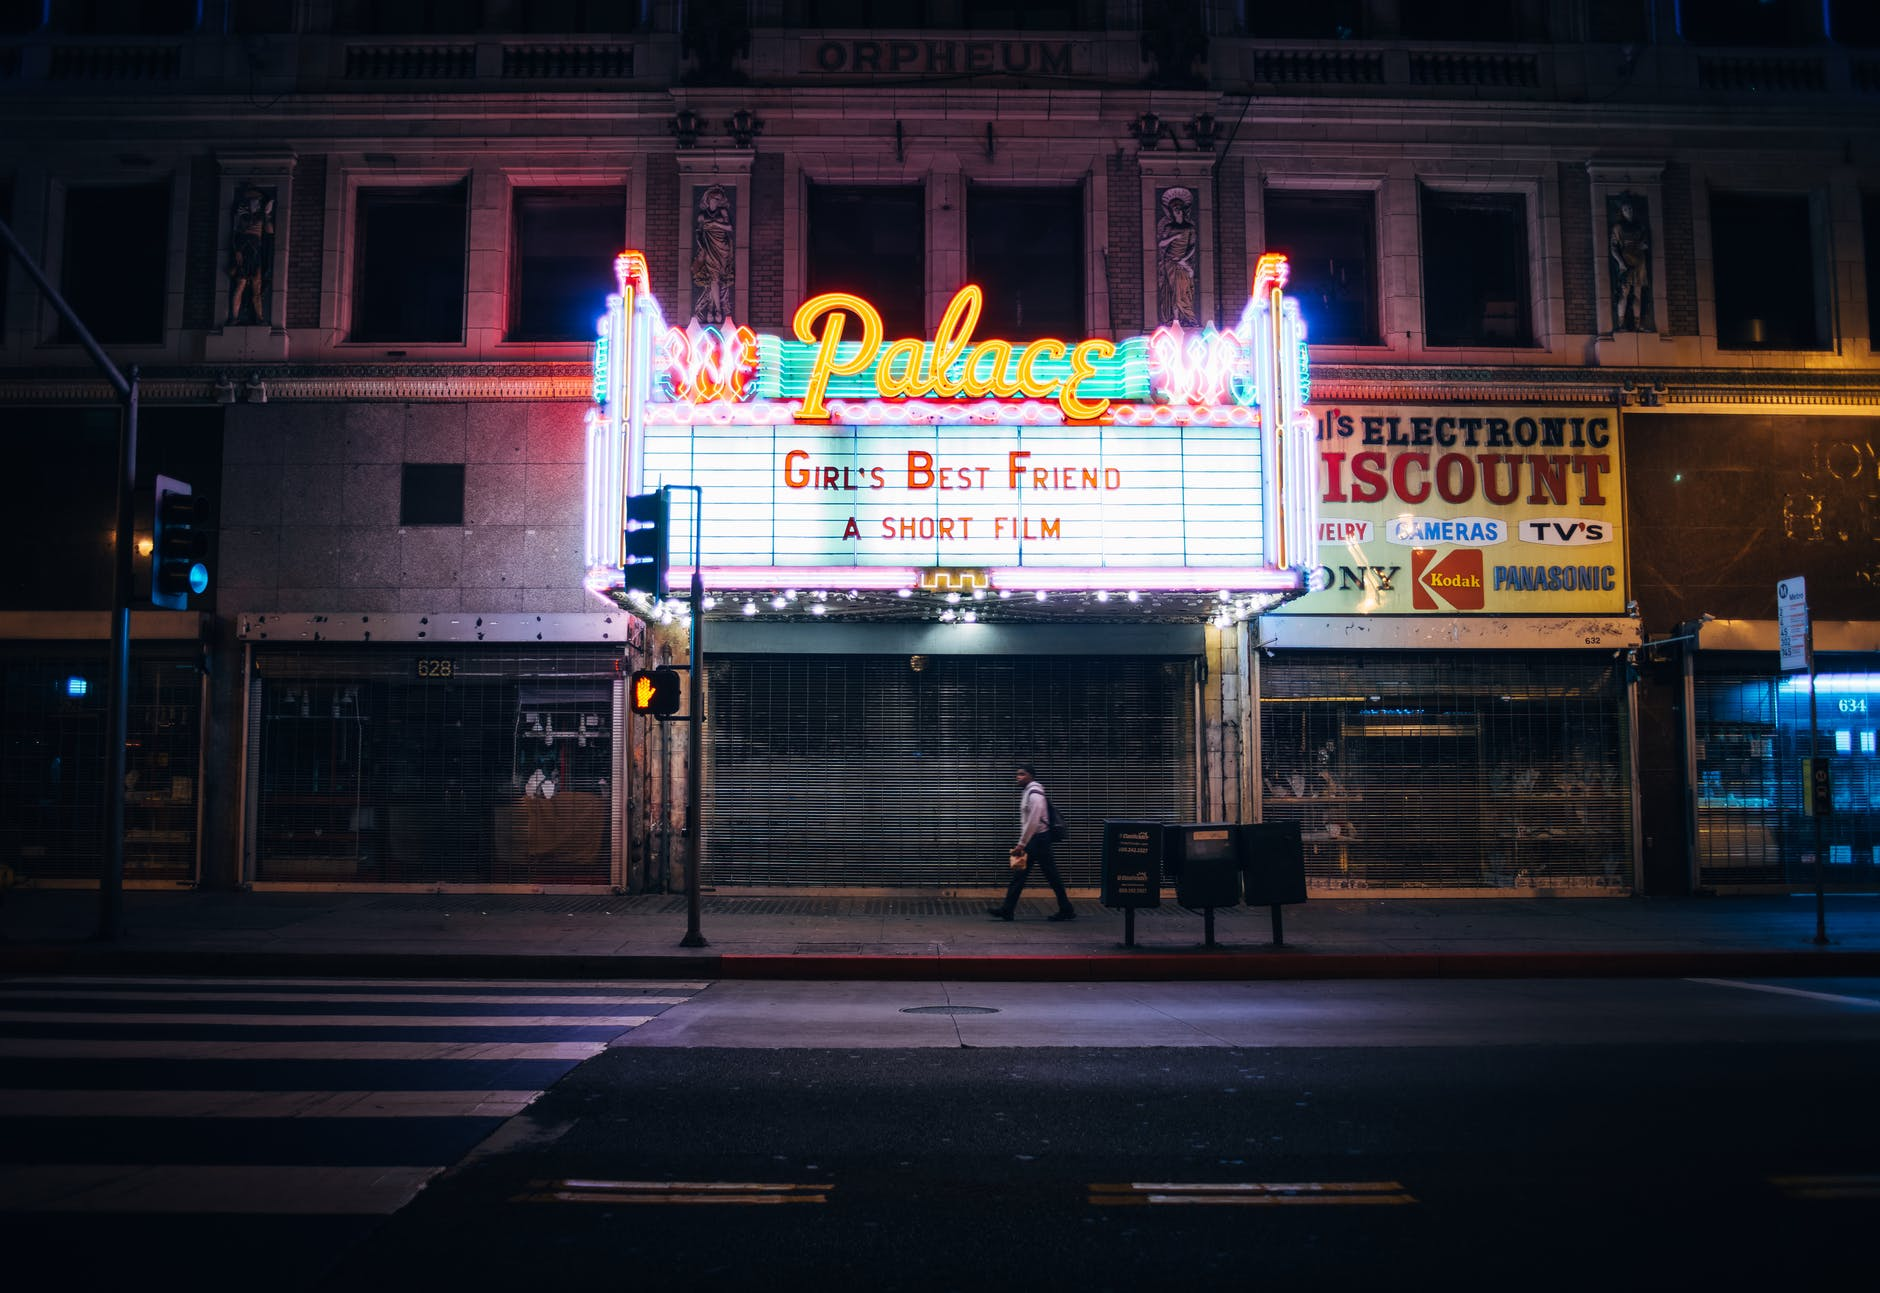

In [1]:
#Loading the pre-processed data
import pandas as pd
data=pd.read_csv('processed_IMDB_final.csv')

In [2]:
data.head()

,Unnamed: 0,review,sentiment,review_nostop,rev_nostop_stemmed
0,0,one of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...,one review mention watch 1 oz episod youll hoo...
1,1,a wonderful little production the filming tech...,positive,wonderful little production filming technique ...,wonder littl product film techniqu unassum old...
2,2,i thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,thought wonder way spend time hot summer weeke...
3,3,basically theres a family where a little boy j...,negative,basically theres family little boy jake thinks...,basic there famili littl boy jake think there ...
4,4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter mattei love time money visual stun film...


In [3]:
new_data=data.drop(columns='Unnamed: 0',axis=1)
new_data=new_data.drop(columns='review',axis=1)
new_data=new_data.drop(columns='review_nostop',axis=1)
new_data.head()

,sentiment,rev_nostop_stemmed
0,positive,one review mention watch 1 oz episod youll hoo...
1,positive,wonder littl product film techniqu unassum old...
2,positive,thought wonder way spend time hot summer weeke...
3,negative,basic there famili littl boy jake think there ...
4,positive,petter mattei love time money visual stun film...


Extracting feature and target columns

In [5]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
sentiments=lb.fit_transform(
    new_data['sentiment']
)

In [6]:
sentiments[:5]

array([[1],
       [1],
       [1],
       [0],
       [1]])

In [ ]:
#positive =1   negative=0

In [7]:
reviews=new_data['rev_nostop_stemmed']
reviews.head()

0    one review mention watch 1 oz episod youll hoo...
1    wonder littl product film techniqu unassum old...
2    thought wonder way spend time hot summer weeke...
3    basic there famili littl boy jake think there ...
4    petter mattei love time money visual stun film...
Name: rev_nostop_stemmed, dtype: object

In [8]:
#Splitting into train and test dataset:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(
    reviews,sentiments,test_size=0.2,stratify=sentiments,random_state=42
)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews=cv.fit_transform(X_train)
cv_test_reviews=cv.transform(X_test)
print('Bag of Words on training data: {}\n'.format(cv_train_reviews.shape))
print('Bag of Words on training data: {}'.format(cv_test_reviews.shape))

Bag of Words on training data: (40000, 6138997)

Bag of Words on training data: (10000, 6138997)


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_trained=lr.fit(
    cv_train_reviews,Y_train
)

C:\Users\PROMIT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [20]:
print(lr_trained)

LogisticRegression(C=1, max_iter=500, random_state=42)


Making Predictions

In [21]:
lr_predict=lr_trained.predict(cv_test_reviews)
print(lr_predict)

[0 0 0 ... 0 0 0]


Evaluating performance 

In [22]:
from sklearn.metrics import accuracy_score
accuracy_lr=accuracy_score(Y_test,lr_predict)
print('The accuracy for logistic regression is : {}'.format(accuracy_lr))

The accuracy for logistic regression is : 0.5983


In [23]:
from sklearn.metrics import classification_report
report=classification_report(
    Y_test,lr_predict,target_names=['negative','positive']
)
print(report)


              precision    recall  f1-score   support

    negative       0.56      0.98      0.71      5000
    positive       0.91      0.22      0.35      5000

    accuracy                           0.60     10000
   macro avg       0.73      0.60      0.53     10000
weighted avg       0.73      0.60      0.53     10000



Confusion matrix

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,lr_predict)

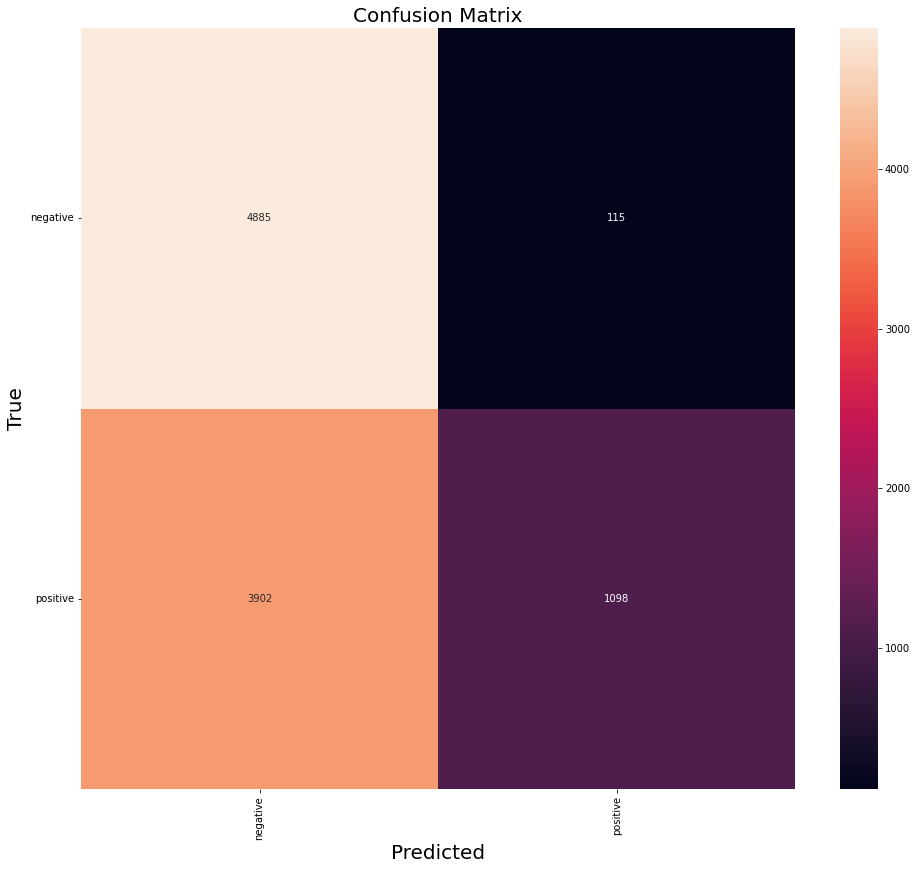

In [46]:
import matplotlib.pyplot as plt
labels={'negative','positive'}
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

# Linear Support Vector Classifier

In [11]:
from sklearn.linear_model import SGDClassifier

In [13]:
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
svm_trained=svm.fit(
    cv_train_reviews,Y_train
)
print(svm_trained)

SGDClassifier(max_iter=500, random_state=42)


Evaluating Model performance

In [14]:
svm_predict=svm_trained.predict(cv_test_reviews)
print(svm_predict)

[0 0 0 ... 0 0 0]


In [17]:
accuracy_score(Y_test,svm_predict)

0.5447

In [24]:
report_svm=classification_report(
    Y_test,svm_predict,target_names=['negative','positive']
)

In [25]:
print(report_svm)

              precision    recall  f1-score   support

    negative       0.52      1.00      0.69      5000
    positive       0.97      0.09      0.17      5000

    accuracy                           0.54     10000
   macro avg       0.75      0.54      0.43     10000
weighted avg       0.75      0.54      0.43     10000



In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
cm_svm = confusion_matrix(Y_test,svm_predict)

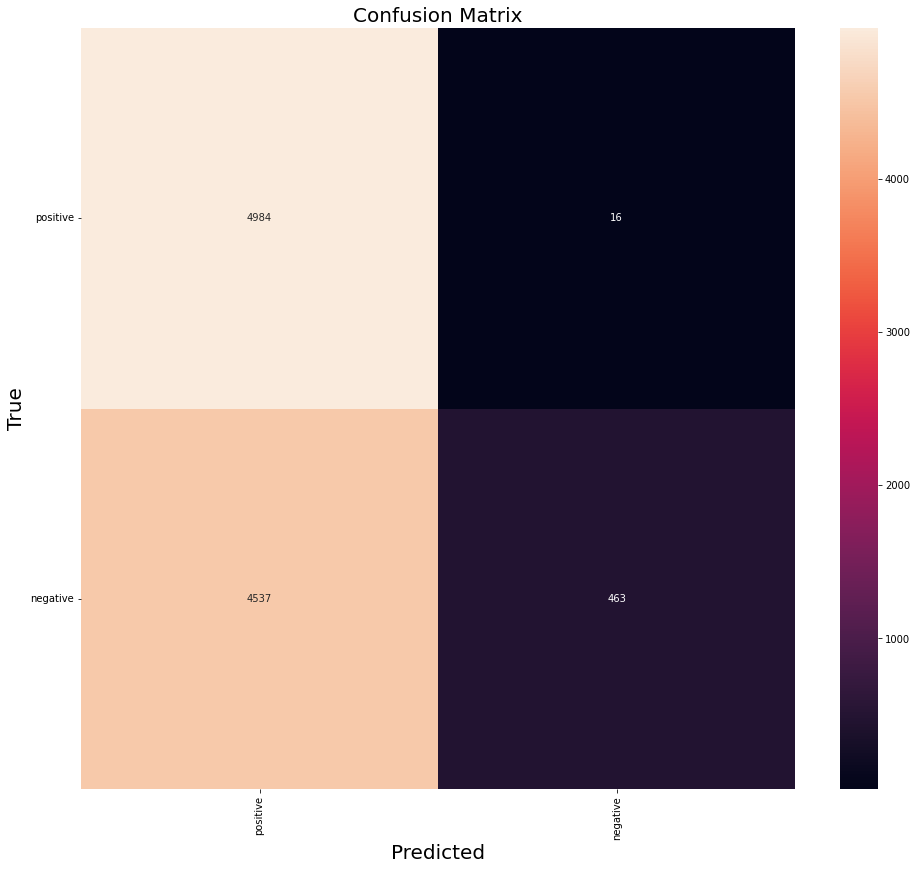

In [28]:
import matplotlib.pyplot as plt
labels={'negative','positive'}
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

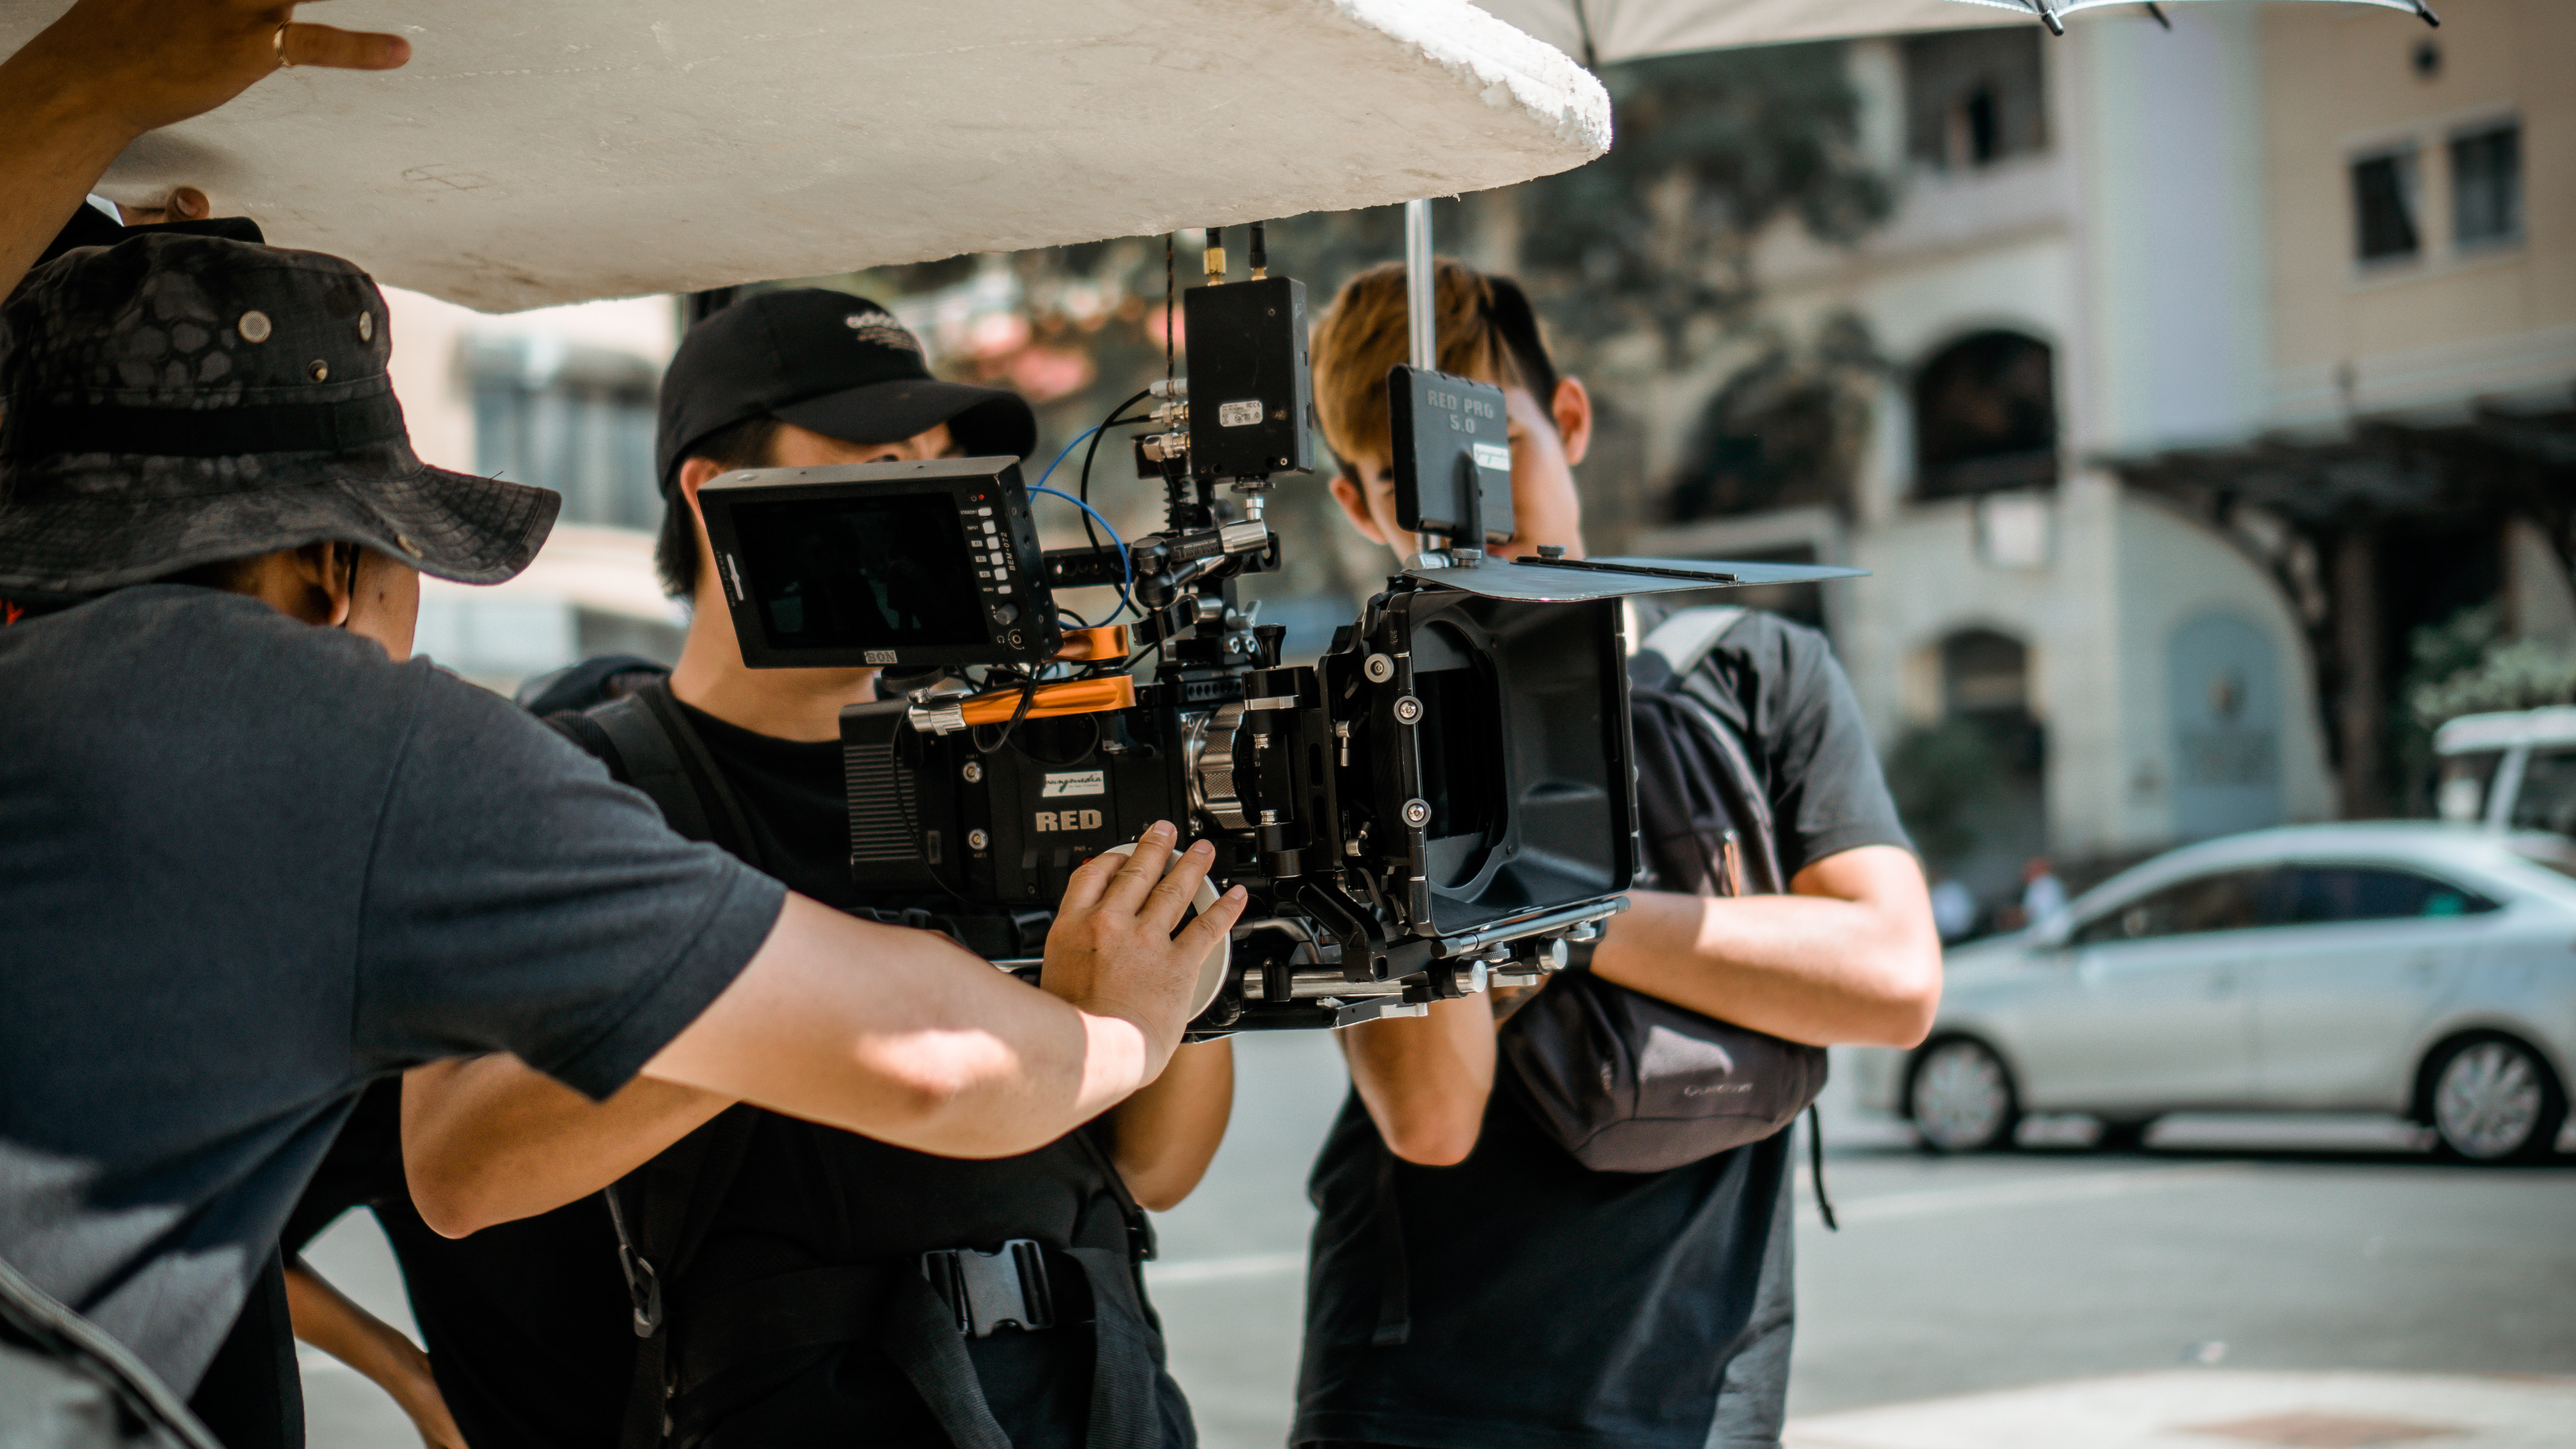